In [9]:
# Imports
%matplotlib inline
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.signal as signal

from remove_dc_from_spad import remove_dc_from_spad_edge
from capture_utils import load_spad
from matplotlib.ticker import FormatStrFormatter

from capture_utils import savefig_no_whitespace

scene = "8_30_small_lab_scene"
# scene = "8_29_kitchen_scene"
# scene = "8_30_conference_room2_scene"
model = "midas"
scenedir = os.path.join("figures", model, scene)
rootdir = os.path.join("data", scene)

In [24]:
# Load SPAD and intermediates
spad_hists = {}
for file in ["spad_single_relevant", "spad_denoised", "spad_corrected", "spad_sid"]:
    spad_hists[file] = np.load(os.path.join(scenedir, file + ".npy"))
intermediates = np.load(os.path.join(scenedir, "intermediates.npy"), allow_pickle=True).item()
spad_metadata = np.load(os.path.join(scenedir, "spad_metadata.npy"), allow_pickle=True).item()
spad_metadata["init_bin_edges"] = spad_metadata["init_bin_edges:"]
# Extract stuff
bin_edges = spad_metadata["init_bin_edges"]
bin_values = spad_metadata["init_bin_values"]
init_sid_bin_edges = spad_metadata["init_sid_bin_edges"]
init_sid_bin_values = spad_metadata["init_sid_bin_values"][:-2]
pred_sid_bin_edges = spad_metadata["pred_sid_bin_edges"]
pred_sid_bin_values = spad_metadata["pred_sid_bin_values"][:-2]
ambient_estimate = spad_metadata["ambient_estimate"]

In [23]:
len(init_sid_bin_values)

602

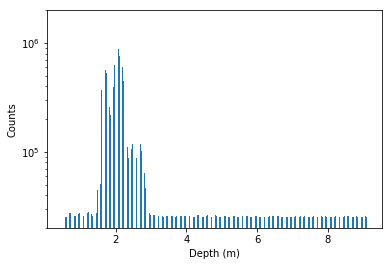

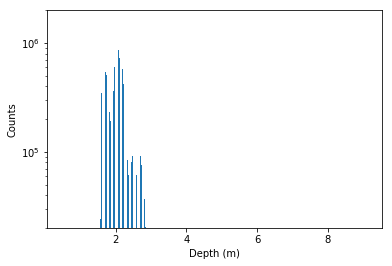

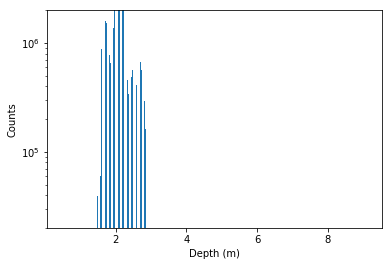

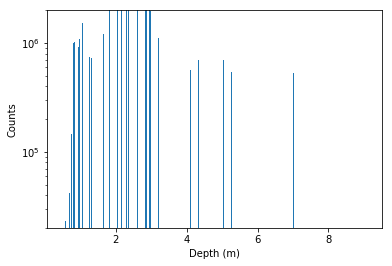

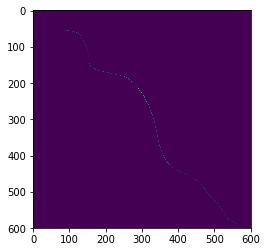

In [26]:
# Plot and save stuff
ymin = 2e4
ymax = 5e6
# Raw SPAD
plt.figure()
plt.bar(bin_values, spad_hists["spad_single_relevant"],  log=True, width=0.001)
plt.xlabel("Depth (m)")
plt.ylabel("Counts")
plt.ylim([ymin, ymax])
plt.savefig(os.path.join(scenedir, "spad_single_relevant.pdf"), bbox_inches="tight")

# Remove ambient
plt.figure()
plt.bar(bin_values, spad_hists["spad_denoised"], log=True, width=0.001)
plt.xlabel("Depth (m)")
plt.ylabel("Counts")
plt.ylim([ymin, ymax])
plt.savefig(os.path.join(scenedir, "spad_denoised.pdf"), bbox_inches="tight")

# Correct falloff
plt.figure()
plt.bar(bin_values, spad_hists["spad_corrected"], log=True, width=0.001)
plt.xlabel("Depth (m)")
plt.ylabel("Counts")
plt.ylim([ymin, ymax])
plt.savefig(os.path.join(scenedir, "spad_corrected.pdf"), bbox_inches="tight")

# Re-bin
plt.figure()
plt.bar(init_sid_bin_values, spad_hists["spad_sid"], log=True, width=0.001)
plt.xlabel("Depth (m)")
plt.ylabel("Counts")
plt.ylim([ymin, ymax])
plt.savefig(os.path.join(scenedir, "spad_sid.pdf"), bbox_inches="tight")

# Intensity-weighted histogram
plt.figure()
plt.imshow(intermediates["T_count"])
plt.savefig(os.path.join(scenedir, "T_count.pdf"), bbox_inches="tight")



In [17]:
spad_single_relevant

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)